In [6]:
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import Scaler, PersistenceEntropy, BettiCurve
from scipy.io import loadmat
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def singleSpkCounts(dt, i=-1):
    st = dt["stall"]
    
    if i == -1:
        output = np.mean(st, axis=0)
    else:
        output = st[i, :]
    
    return output

In [8]:
def regAvgSpkCounts(dt):
    spktrains = dt["stall"]
    regIDs = dt["brainLoc"]
    regLbs = dt["areaLabels"]
    
    unique_regs = np.unique(regIDs)
    if unique_regs[0] == 0:
        unique_regs = unique_regs[1:]
    n_regs = len(unique_regs)
    
    N, T = spktrains.shape
    avgs = np.zeros((n_regs, T))
    
    for i in range(n_regs):
        fltr = np.flatnonzero(regIDs == unique_regs[i])
        avgs[i, :] = np.mean(spktrains[fltr, :], axis=0)
    
    return avgs

In [9]:
def swe(st, t=0, d=0):
    maxt = 50
    maxd = 50
    s = 1
    
    if d == 0 or t == 0:
        embedder = SingleTakensEmbedding(
            parameters_type = "search",
            time_delay = maxt,
            dimension = maxd,
            stride = s
        )
    else:
        embedder = SingleTakensEmbedding(
            parameters_type = "fixed",
            time_delay = t,
            dimension = d,
            stride = s
        )
    
    embedded = embedder.fit_transform(st)
    print("Time Delay: {}\tDimension: {}".format(embedder.time_delay_, embedder.dimension_))
    
    return embedded

In [50]:
names = ["Krebs", "Waksman", "Robbins"]
dataset = loadmat("../../Data/source/{}withFaces_KS2.mat".format(names[0]))

(0.0, 1.0)

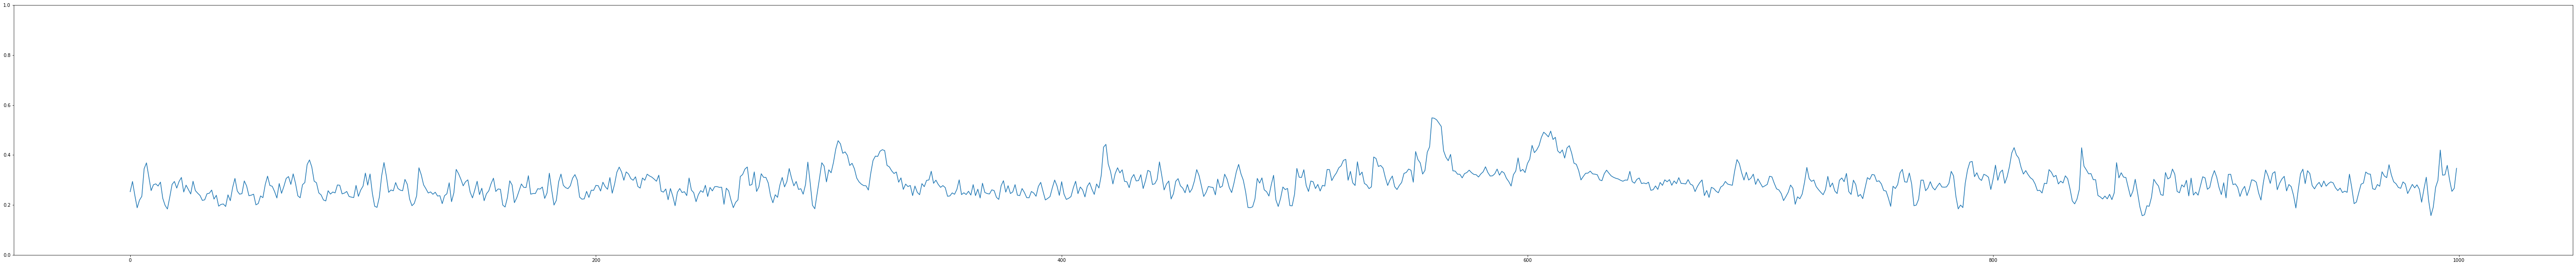

In [20]:
sc = singleSpkCounts(dataset)[61000:62000]

plt.figure(figsize=(100, 10))
plt.plot(st)
plt.ylim((0, 1))

(0.0, 2.0)

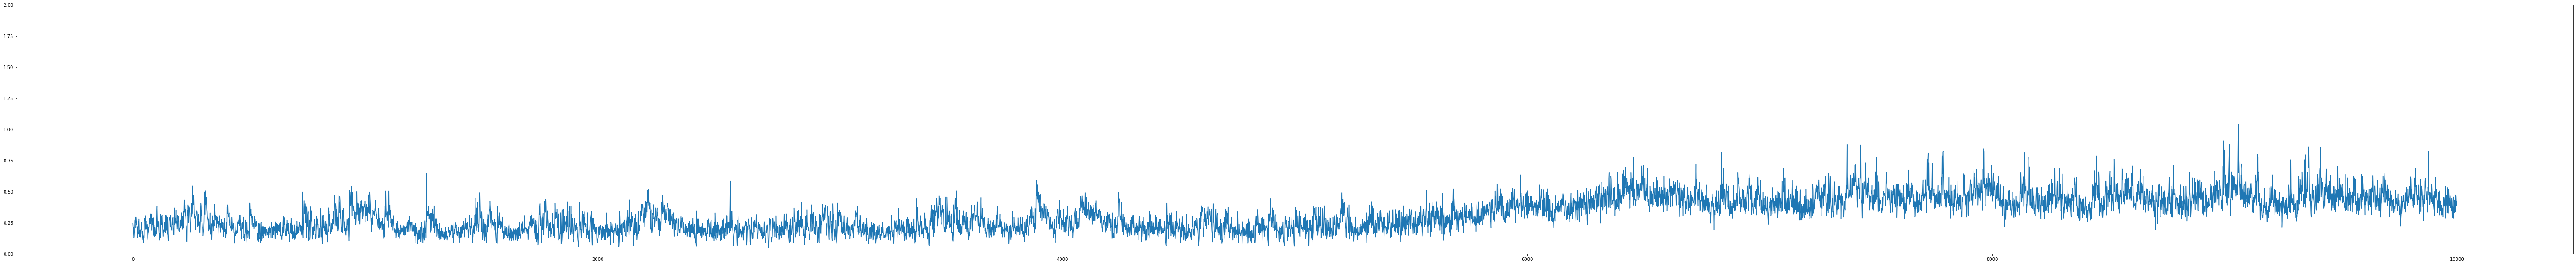

In [109]:
sc_reg = regAvgSpkCounts(dataset)[6, 15000:25000]

plt.figure(figsize=(100, 10))
plt.plot(sc_reg)
plt.ylim((0, 2))

In [110]:
embedded = swe(sc_reg, 5, 50)

embedded_pca = embedded
if embedded.shape[1] > 3:
    pca = PCA(n_components=3)
    embedded_pca = pca.fit_transform(embedded)

plot_point_cloud(embedded_pca[:, [0, 1, 2]])

Time Delay: 5	Dimension: 50


In [99]:
embedded_ph = embedded[None, :, :]
ph = VietorisRipsPersistence(homology_dimensions=[0, 1, 2], n_jobs=6)
diag = ph.fit_transform(embedded_ph)
ph.plot(diag)

In [289]:
diag_scaler = Scaler()
diag_scaled = diag_scaler.fit_transform(diag)

In [290]:
BC = BettiCurve()
bc = BC.fit_transform(diag_scaled)
BC.plot(bc)

In [212]:
PE = PersistenceEntropy()
pe = PE.fit_transform(diag_scaled)

#plt.figure(figsize=(100, 10))
#plt.plot(pe[:, 0], label="PH0")
#plt.plot(pe[:, 1], label="PH1")
pe

array([[13.67354928, 13.85855897]])

In [208]:
t = np.linspace(0, 50, 1000)
sn = t * np.sin(t)
cs = t * np.cos(t)
mat = np.vstack((sn, cs, t))

In [209]:
plot_point_cloud(mat.T)

In [62]:
a = np.random.random((3, 3))
b = np.random.random((3, 1))

In [63]:
a

array([[0.1806964 , 0.44775674, 0.0234704 ],
       [0.28137968, 0.41522485, 0.57467483],
       [0.47533729, 0.93478891, 0.90081367]])

In [64]:
b

array([[0.23911016],
       [0.57791256],
       [0.38627807]])

In [65]:
idx = b > 0.5
flt = np.flatnonzero(idx)

In [66]:
a[flt, :]

array([[0.28137968, 0.41522485, 0.57467483]])